In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from wordcloud import WordCloud
import nltk 
from nltk.corpus import stopwords 

import re
import string
import operator

In [2]:
data= pd.read_csv("ArcticMonkeys.csv", encoding="ISO-8859-1")

## Frequent words in their songs

In [3]:
stopwords = stopwords.words('english')
stopwords.append("verse")
stopwords.append("chorus")
stopwords.append("know")
stopwords.append("like")

In [4]:
def clean(lyric):
    final_string=[]
    lyric= lyric.replace("\r\n", " ")
    lyric= lyric.replace("\x92", " ")
    clean= re.sub('['+string.punctuation+']', " ", lyric)
    for word in clean.split(" "):
        word= word.lower()
        if len(word) > 3 and word not in stopwords:
            final_string.append(word)
    return(final_string)

In [5]:
words=[]

for lyric in data.lyrics:
    temp_words = clean(lyric)
    words += temp_words
    
number_of_songs = len(data.lyrics)    
total_words= len(words)
unique_words= set(words)

word_dict= {}

for word in unique_words:
    word_dict[word]=0

for word in words:
    word_dict[word] +=1
    
sorted_word_tuple= sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_word_tuple[:15]

[('yeah', 91),
 ('well', 90),
 ('want', 75),
 ('baby', 75),
 ('cause', 71),
 ('wanna', 70),
 ('love', 61),
 ('said', 61),
 ('never', 58),
 ('come', 56),
 ('around', 52),
 ('back', 52),
 ('eyes', 49),
 ('make', 48),
 ('away', 45)]

In [6]:
text= (" ").join(words)

wc = WordCloud(max_words=200, background_color="white").generate(text)

plt.figure(figsize=(9, 6))
plt.axis("off")
plt.imshow(wc)

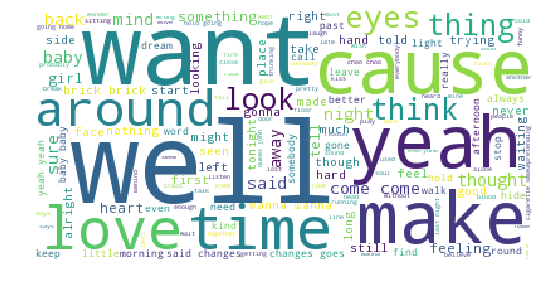

In [7]:
plt.show()

## Repetition of words within songs 

In [20]:
def most_repeated(lyric):
    words=[]
    words = clean(lyric)
    
    total_words= len(words)
    unique_words= set(words)

    word_dict= {}

    for word in unique_words:
        word_dict[word]=0

    for word in words:
        word_dict[word] +=1
    
    sorted_word_tuple= sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)
    most_repeated_word= sorted_word_tuple[0][0]
    count= sorted_word_tuple[0][1]
    lexical_diversity= len(unique_words)/(total_words)
    return(most_repeated_word, count, lexical_diversity)

In [21]:
most_repeated_word_list=[]
count_list=[]
lexical_diversity=[]
for lyric in data.lyrics:
    temp= most_repeated(lyric)
    most_repeated_word_list.append(temp[0])
    count_list.append(temp[1])
    lexical_diversity.append(temp[2])

In [29]:
repetition= pd.DataFrame(
    {
        "most_repeated_word":most_repeated_word_list,
        "count_of_words":count_list,
        "lexical_diversity":lexical_diversity
    }
)

In [31]:
repetition

,count_of_words,lexical_diversity,most_repeated_word
0,4,0.741573,tell
1,5,0.620370,yeah
2,16,0.400000,choo
3,8,0.447619,smoke
4,4,0.656250,waiting
5,10,0.642857,yeah
6,5,0.493976,well
7,6,0.566667,remember
8,13,0.574074,come
9,4,0.813559,yeah


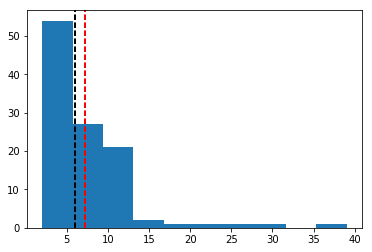

In [44]:
plt.hist(repetition.count_of_words, 10)
plt.axvline(repetition.count_of_words.median(), color='#000000', linestyle='dashed', linewidth=2)
plt.axvline(repetition.count_of_words.mean(), color='r', linestyle='dashed', linewidth=2)
plt.show()

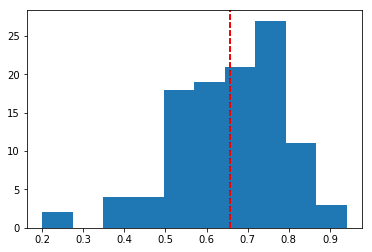

In [45]:
plt.hist(repetition.lexical_diversity, 10)
plt.axvline(repetition.lexical_diversity.mean(), color='#000000', linestyle='dashed', linewidth=2)
plt.axvline(repetition.lexical_diversity.median(), color='r', linestyle='dashed', linewidth=2)
plt.show()

## Sentiment Analysis using words and adjectives